olegs says:
 * make a plot s2n ratio vs rms for both wsclean and vacuum
 * image noise ~ SEFD*constant
 * So make an image without sources, measure its rms
 * then constant = rms/SEFD
 * (but 'constant' will be different with different telescopes, different observation time, etc.)

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SNR_wsclean = []
SNR_vacuum = []
rms = []
sefd = 520  # specified in the spiel simulation pipeline

for i in range(1800, 1900):
    f = f'/scratch/datasets/meerkat16_deep2like/rms/{i}-wsclean-dirty.fits'
    noise_data = fits.open(f)[0].data

    f = f'/scratch/datasets/meerkat16_deep2like/{i}-wsclean-residual.fits'
    wsclean_data = fits.open(f)[0].data
    
    f = f'/scratch/vacuum-cleaner/test/meerkat16_deep2like/fits/{i}-residuals.fits'
    vacuum_data = fits.open(f)[0].data
    
    SNR_wsclean.append(np.max(wsclean_data) / np.std(noise_data))
    SNR_vacuum.append(np.max(vacuum_data) / np.std(noise_data))
    rms.append(np.std(noise_data))

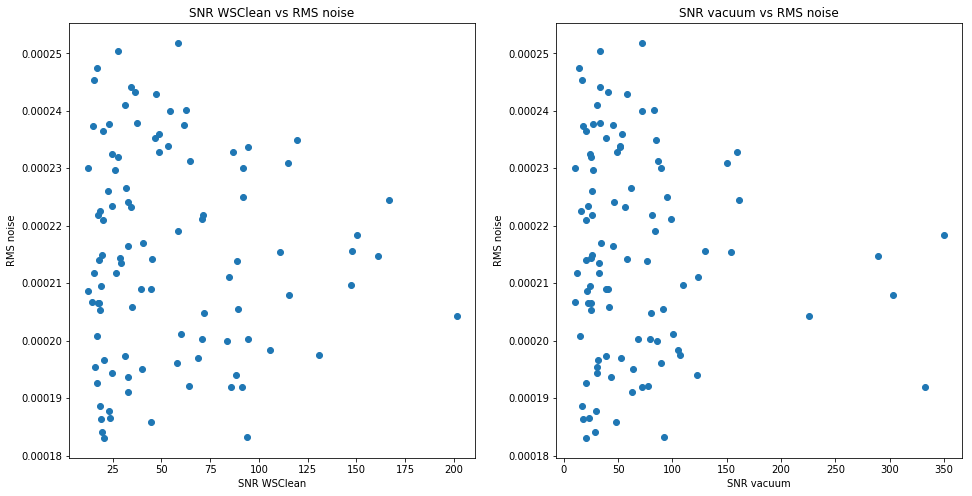

In [3]:
f, (a1, a2) = plt.subplots(1, 2, figsize=(16,8))
a1.plot(SNR_wsclean, rms, 'o')
a1.set_xlabel('SNR WSClean')
a1.set_ylabel('RMS noise')
a1.set_title('SNR WSClean vs RMS noise')
a2.plot(SNR_vacuum, rms, 'o')
a2.set_xlabel('SNR vacuum')
a2.set_ylabel('RMS noise')
_ = a2.set_title('SNR vacuum vs RMS noise')